#### Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
#### Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
Points to Remember:
- There are no null values in the dataset. 
- There may be some customers with no loan history. 
- The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
- For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
- You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  


In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Models:
#(for classification)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score


In [2]:
# READING THE DATASET
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [40]:
df.shape

(209593, 37)

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [6]:
df.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [8]:
#categorical features
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in  DataSet:",categorical.shape[1])

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])

Categorical Features in  DataSet: 3
Numerical Features in DataSet: 34


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755200
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377700
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809400
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


#### Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:
Univariate Analysis:

before analysis we will take all the continuous and numerical data into list.

In [10]:
df_con_features=df[['aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']]

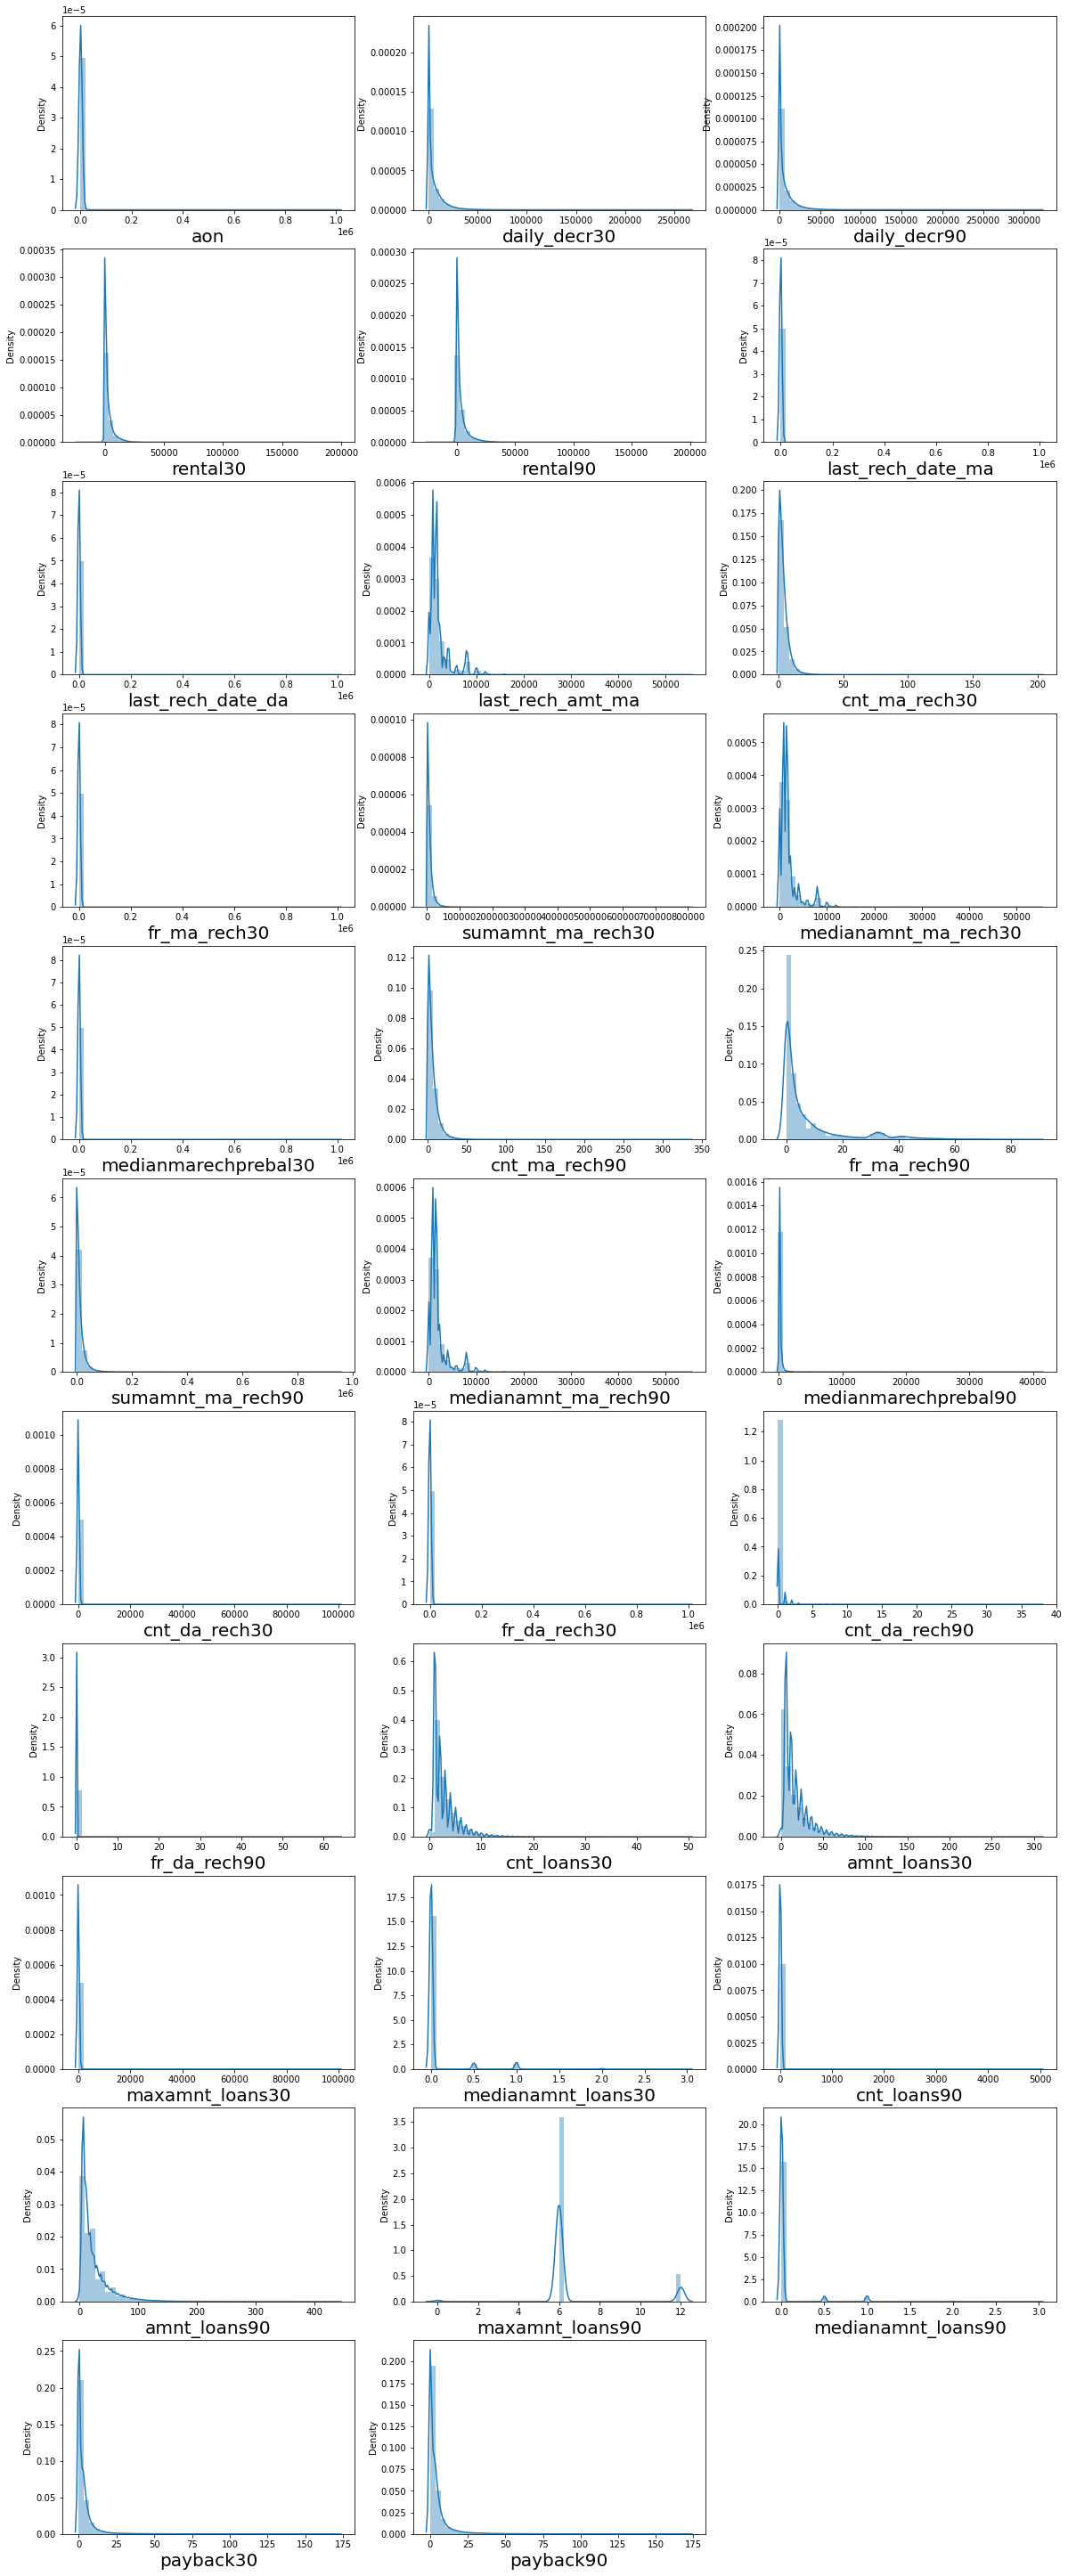

In [11]:
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=33:
        ax=plt.subplot(11,3,plotnumber)
        sns.distplot(df_con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

1    183431
0     26162
Name: label, dtype: int64

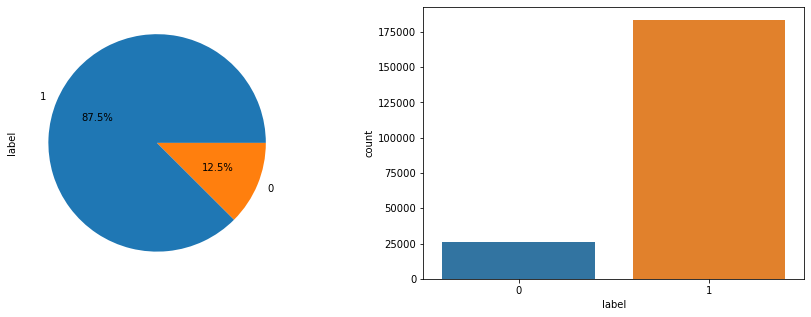

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['label'])
df['label'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

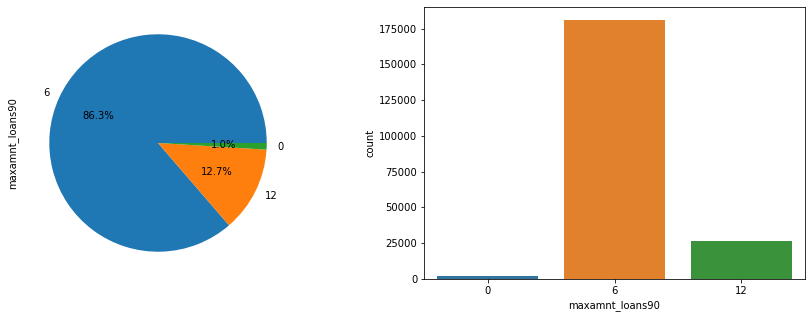

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['maxamnt_loans90'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['maxamnt_loans90'])
df['maxamnt_loans90'].value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

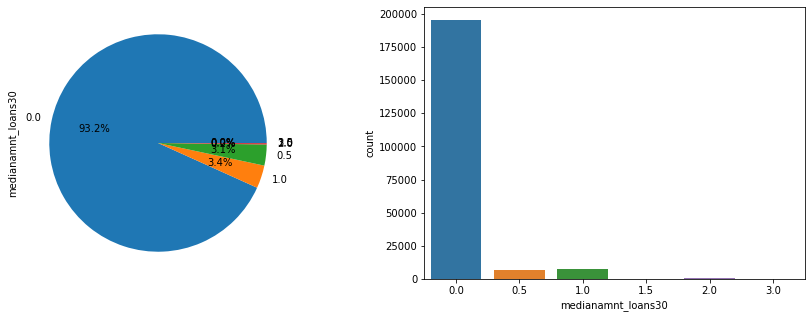

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['medianamnt_loans30'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['medianamnt_loans30'])
df['medianamnt_loans30'].value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

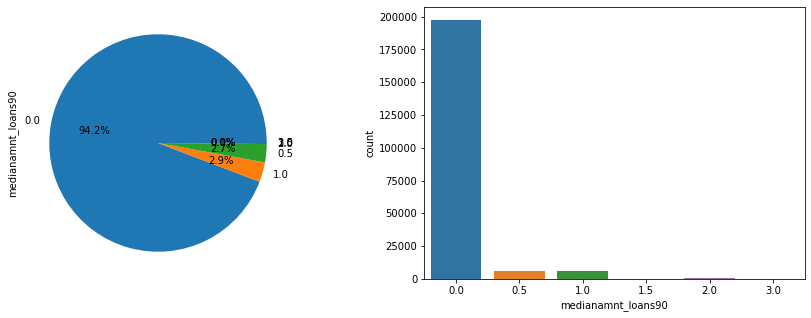

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['medianamnt_loans90'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['medianamnt_loans90'])
df['medianamnt_loans90'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

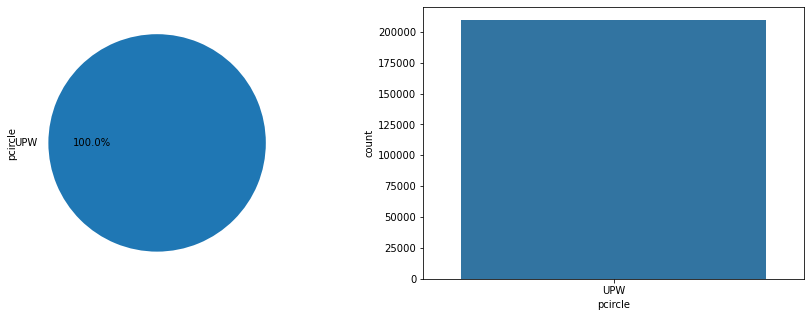

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['pcircle'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['pcircle'])
df['pcircle'].value_counts()

In [18]:
df['pdate'].value_counts()

04-07-2016    3150
05-07-2016    3127
07-07-2016    3116
20-06-2016    3099
17-06-2016    3082
              ... 
04-06-2016    1559
18-08-2016    1407
19-08-2016    1132
20-08-2016     788
21-08-2016     324
Name: pdate, Length: 82, dtype: int64

In [20]:
df['msisdn'].value_counts()

04581I85330    7
47819I90840    7
42825I88688    6
22038I88658    6
60744I91197    6
              ..
49271I84456    1
86858I70780    1
05806I84458    1
36480I85340    1
94566I89234    1
Name: msisdn, Length: 186243, dtype: int64

#### Outlier Detection:
We are using Boxplot to check outliers.

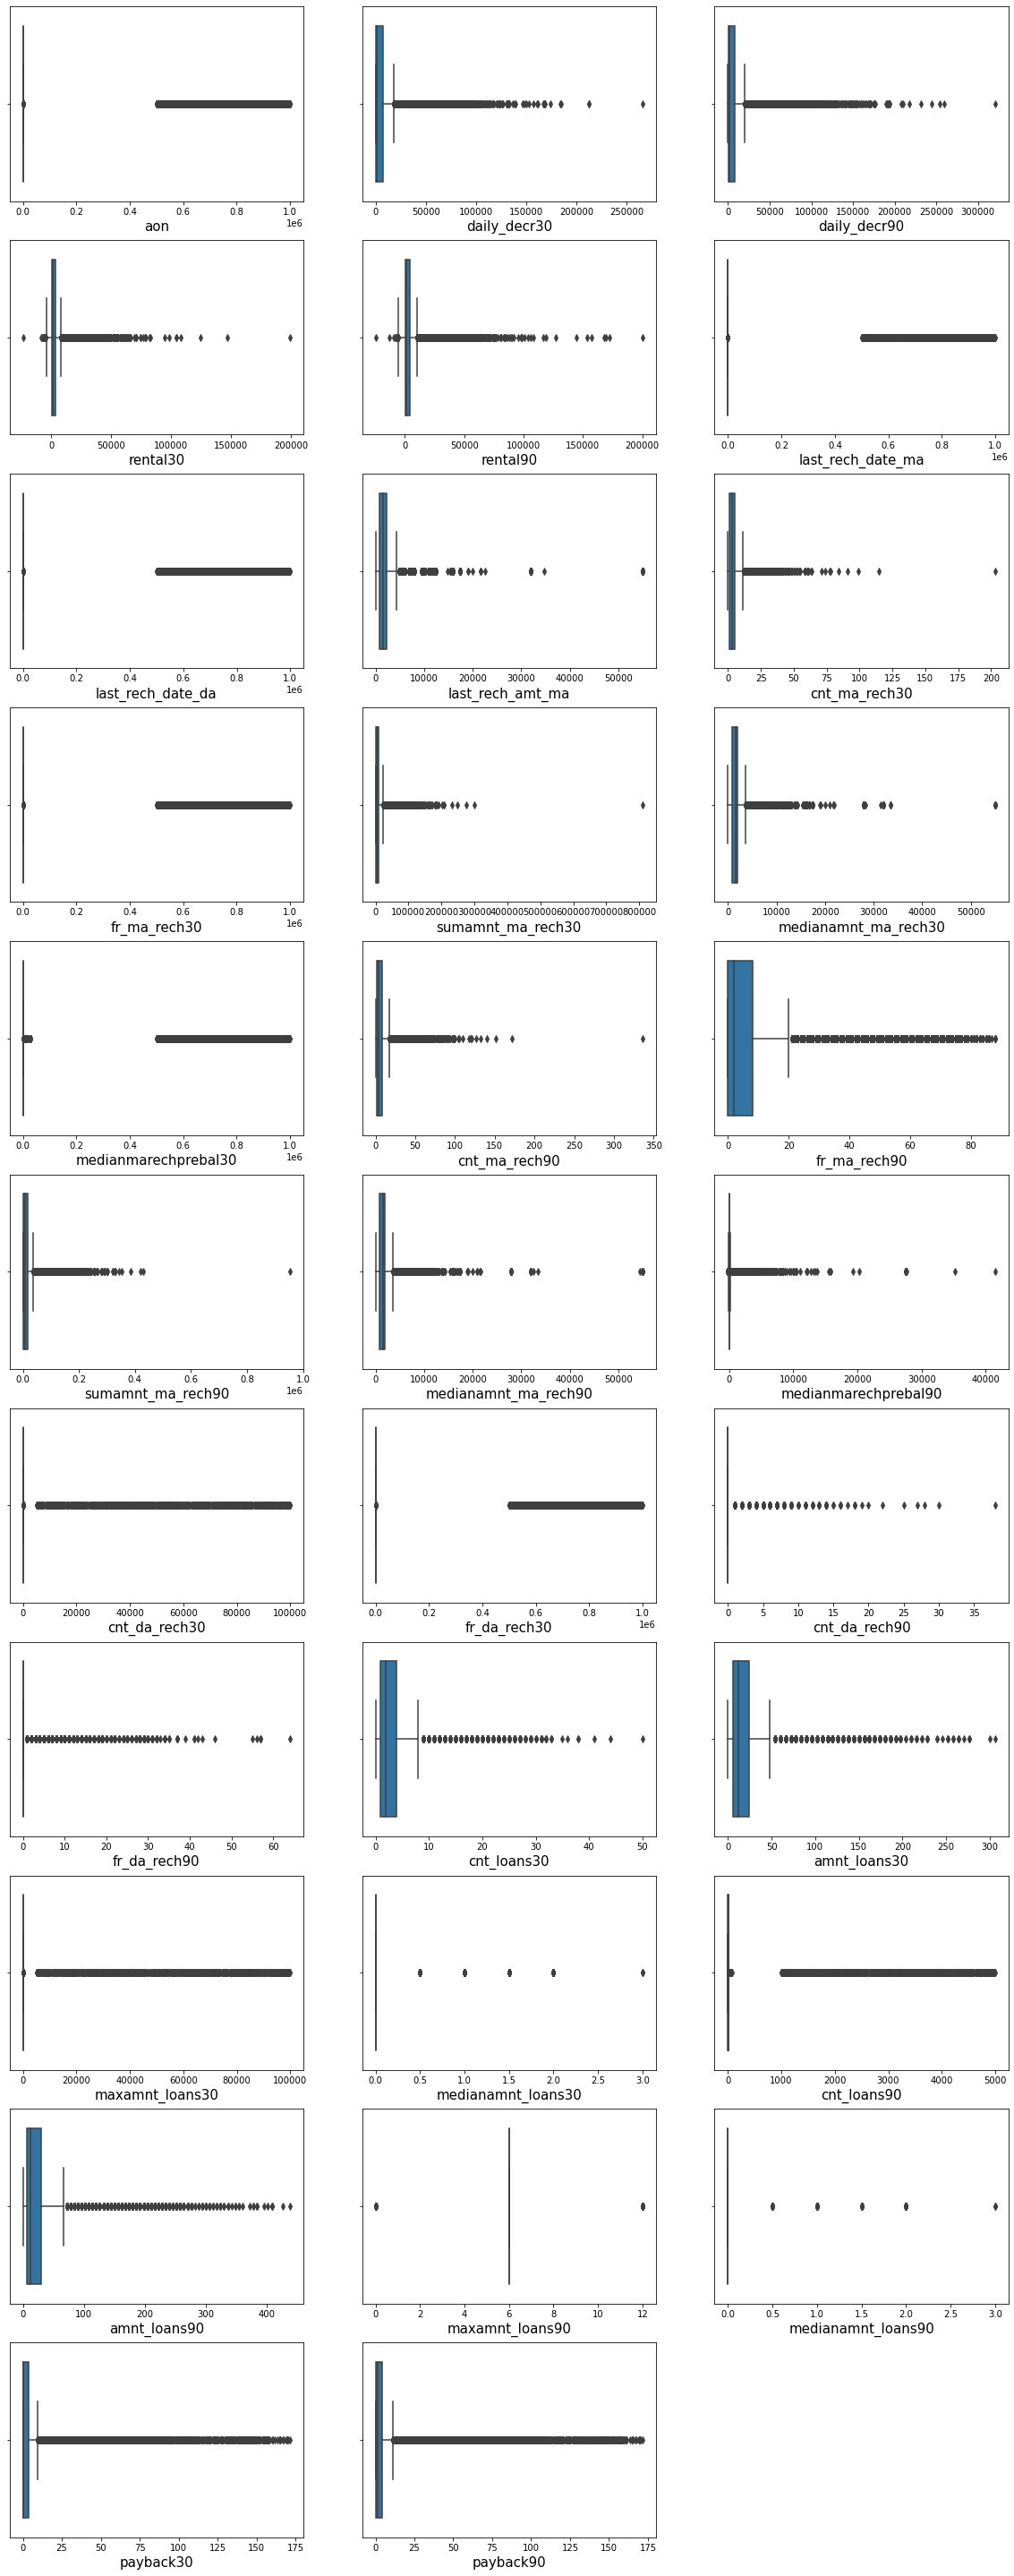

In [16]:
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=33:
        ax=plt.subplot(11,3,plotnumber)
        sns.boxplot(df_con_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [17]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

#### Bivariate analysis:
Checking the relation between Loan_Status with continuous features first.

In [18]:
#### dividing the feature and label for further operations:
y = df['label']
x = df.drop(columns=['label'])

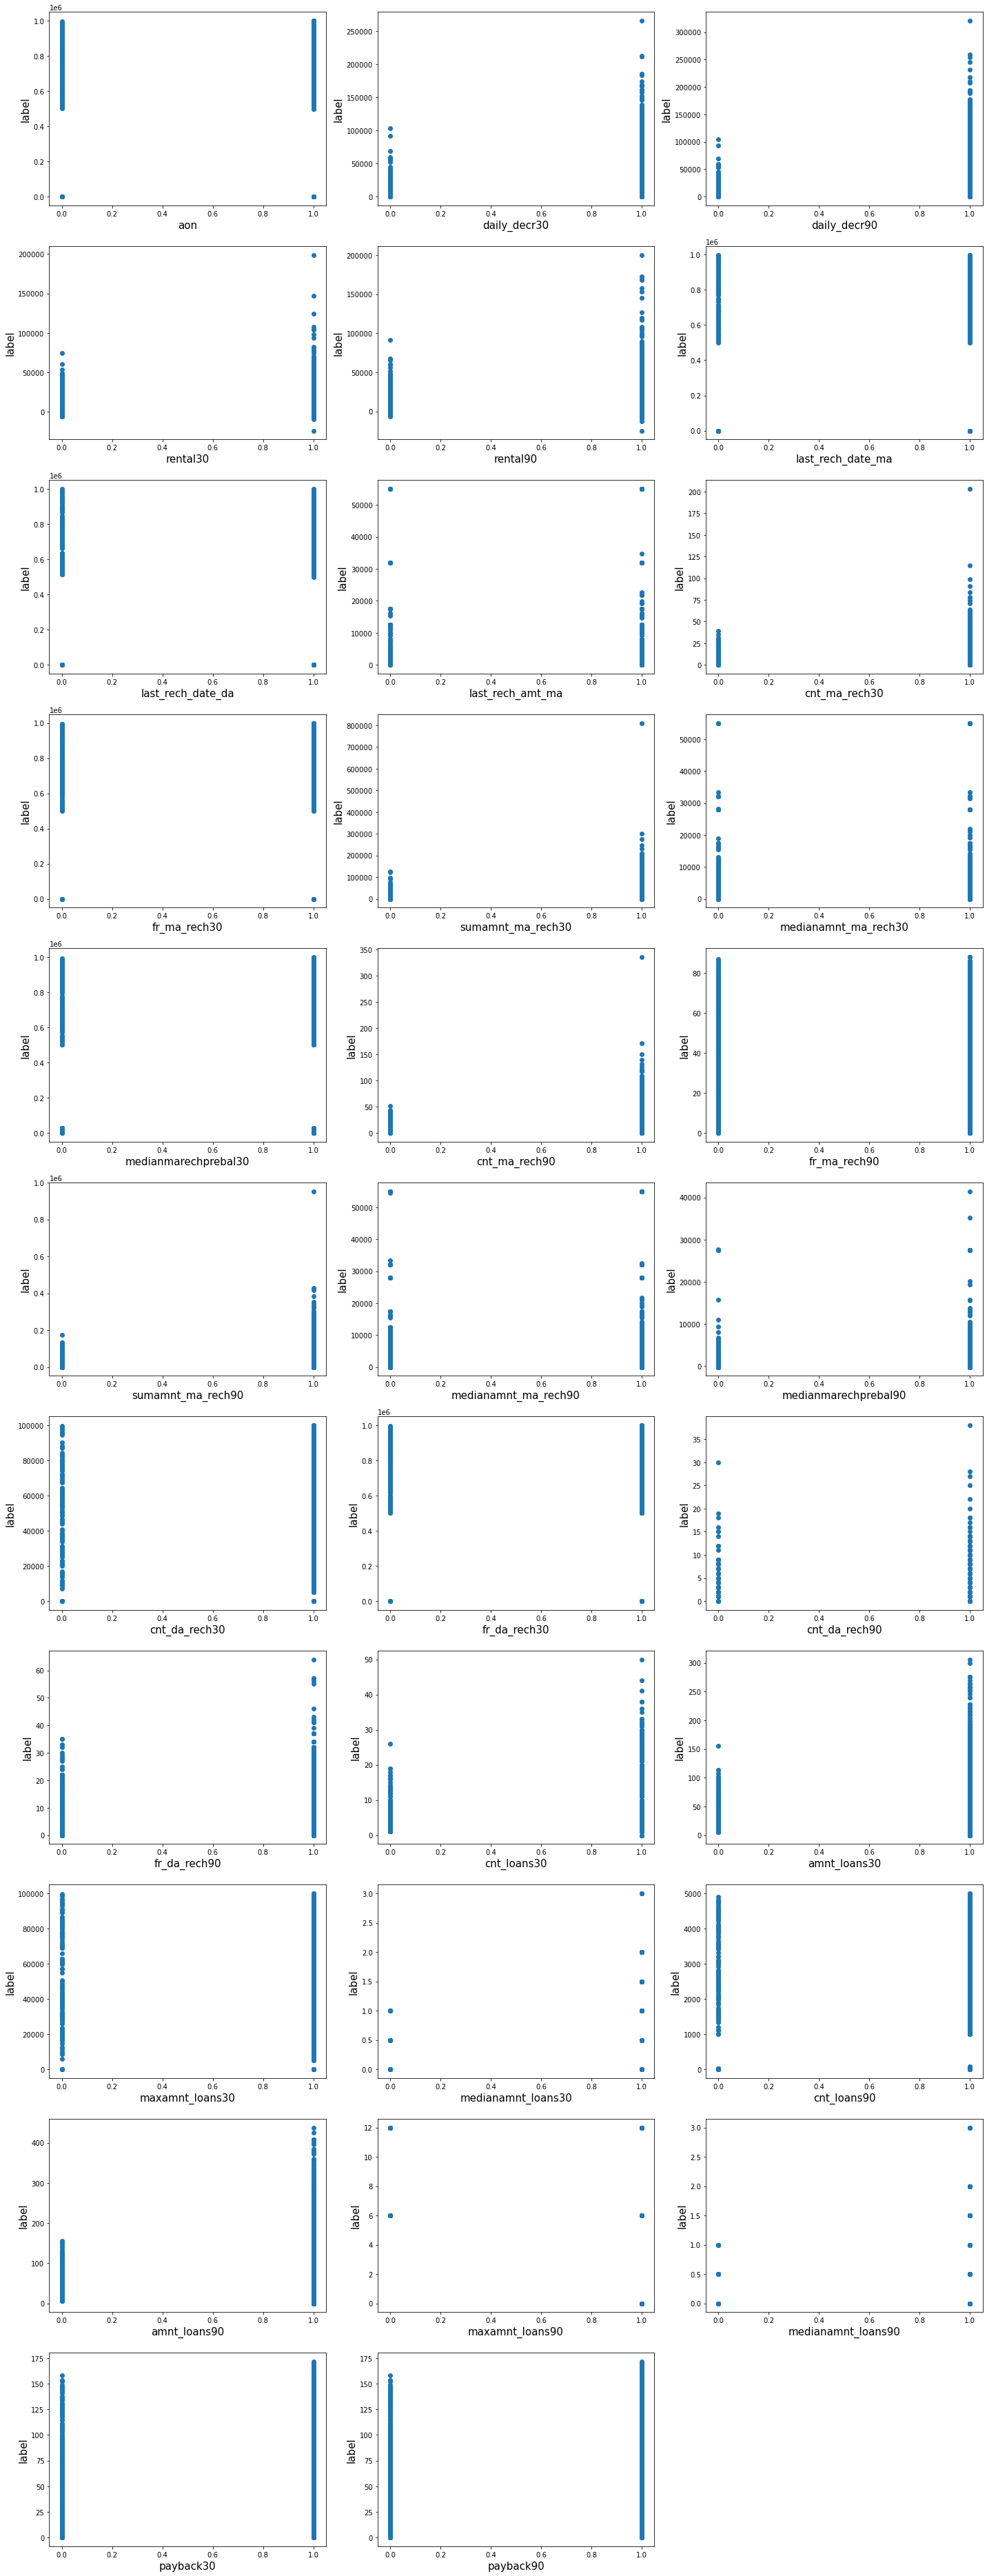

In [20]:
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=33:
        ax=plt.subplot(11,3,plotnumber)
        plt.scatter(y,df_con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('label',fontsize=15)
    plotnumber+=1
plt.tight_layout()

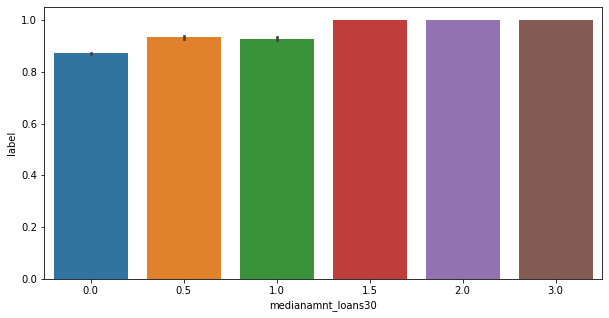

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(y='label',x='medianamnt_loans30',data=df)
plt.show()

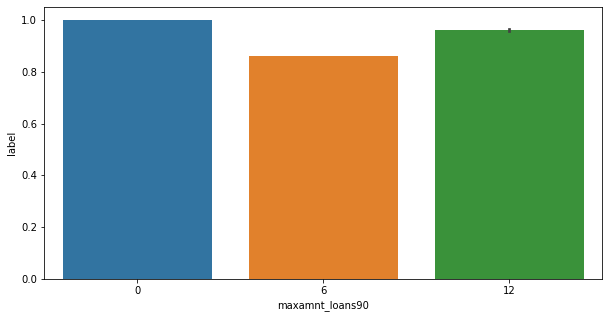

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(y='label',x='maxamnt_loans90',data=df)
plt.show()

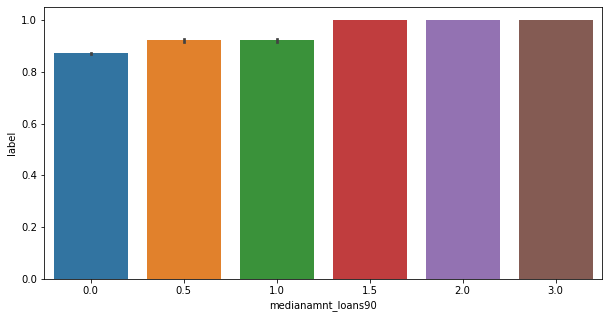

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(y='label',x='medianamnt_loans90',data=df)
plt.show()

In [3]:
corr=df.corr()
corr.shape

(34, 34)

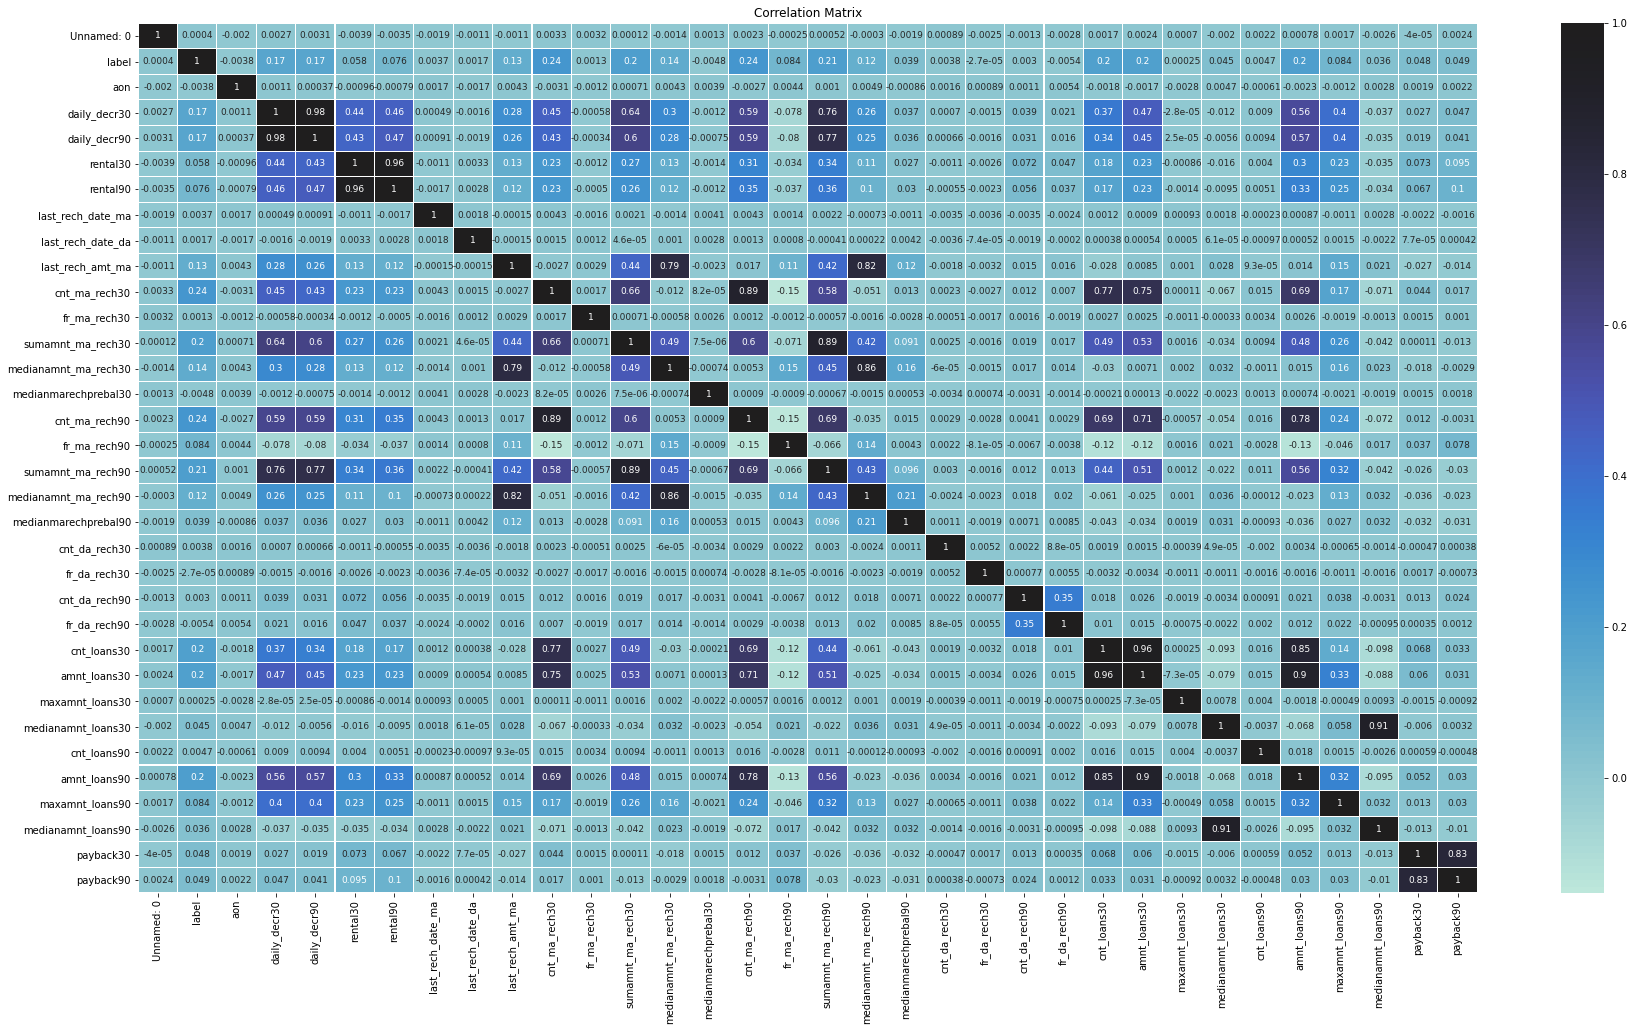

In [17]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(30,16))
sns.heatmap(corr,annot=True,linewidths=.1,fmt='.2g',center=True,annot_kws={'size':9})
plt.title('Correlation Matrix')
plt.show()

- correlation between daily_decr90 and daily_decr30, rental90 and rental30,sumamnt_ma_rech90 with daily_decr90 and daily_decr30, sumamnt_ma_rech30  correlation between medianamnt_ma_rech90 with last_rech_amt_ma, correlation between cnt_ma_rech30 with cnt_ma_rech90,amnt_loans90 with cnt_ma_rech90 is there

In [41]:
df.drop(columns=['daily_decr90','rental90','sumamnt_ma_rech90','medianamnt_ma_rech90','cnt_ma_rech30','amnt_loans90','medianamnt_loans90'],axis=1,inplace=True)

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'rental30',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'maxamnt_loans90', 'payback30', 'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,220.13,2.0,0.0,1539,21.0,...,2,12,6.0,0.0,2.0,6,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,3691.26,20.0,0.0,5787,0.0,...,1,12,12.0,0.0,1.0,12,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,...,1,6,6.0,0.0,1.0,6,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0.0,...,2,12,6.0,0.0,2.0,6,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,...,7,42,6.0,0.0,7.0,6,2.333333,2.333333,UPW,22-06-2016


In [42]:
df.drop(['msisdn'],axis=1, inplace=True)

#### Data Cleaning and Data Engineering:

1. Skewness removal:

In [7]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
rental30                 4.521929
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
maxamnt_loans90          1.678304
payback30                8.310695
payback90                6.899951
dtype: float64

In [43]:
# skewed features are taken into a list
features=['aon','daily_decr30','rental30','last_rech_date_ma','last_rech_amt_ma',
          'fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90',
          'fr_ma_rech90','medianmarechprebal90','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90',
          'cnt_loans30','amnt_loans30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','maxamnt_loans90',
         'payback30','payback90']

In [44]:
scaler=PowerTransformer(method='yeo-johnson',standardize=True)  # using yeo-johnson method

In [45]:
df[features]=scaler.fit_transform(df[features].values)  # scaling the features

In [46]:
df[features]

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.177112,0.332156,-0.580786,-0.025513,0.083417,1.603299,-0.177906,0.208594,-0.041301,-0.577409,...,-0.162110,-0.064375,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,1.813266,1.783964
1,0.036453,1.116021,0.339736,0.191368,1.501277,-1.128949,0.219811,1.632404,0.016926,-1.027906,...,-0.162110,-0.064375,-0.913019,-0.097563,1.182431,-0.269051,-1.034294,2.325828,-0.937405,-1.018917
2,-0.034659,-0.007508,-0.366965,0.000044,0.083417,-1.128949,-0.535362,0.208594,0.020765,-1.027906,...,-0.162110,-0.064375,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917
3,-0.199213,-1.031486,-0.603059,0.299360,-0.291052,-1.128949,-1.902189,-1.961729,-0.063971,-1.027906,...,-0.162110,-0.064375,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,-0.937405,-1.018917
4,0.114880,-0.682337,-0.310473,0.021231,0.449550,0.188872,1.262660,0.575164,-0.011178,0.657800,...,-0.162110,-0.064375,1.570451,1.454951,-0.101998,-0.269051,1.180312,-0.285611,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.313194,-0.058426,1.051183,0.188872,0.664001,0.903883,0.037462,-0.256024,...,-0.162110,-0.064375,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,0.094998,-0.098305
209589,0.152333,-0.950215,-0.140654,0.021231,-0.429509,-0.239912,-0.175310,-0.303313,0.073687,0.373347,...,-0.162110,-0.064375,0.556347,0.393236,-0.101998,-0.269051,0.300689,-0.285611,0.094998,-0.098305
209590,0.134577,1.100455,0.825400,0.000044,0.083417,1.087596,0.575767,0.208594,0.009245,0.984805,...,-0.162110,-0.064375,0.924658,1.454951,1.182431,-0.269051,1.038116,2.325828,0.974292,0.752939
209591,0.309101,1.136057,-0.515607,-0.025513,-0.429509,0.649604,0.795555,-0.303313,0.074916,0.373347,...,6.168644,-0.064375,0.011773,0.393236,1.182431,-0.269051,0.300689,2.325828,-0.937405,1.337831


In [47]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [48]:
df.skew()

label                   -2.270254
aon                      1.654517
daily_decr30            -6.582718
rental30                -1.022844
last_rech_date_ma       -5.362530
last_rech_date_da       14.814857
last_rech_amt_ma        -0.061262
fr_ma_rech30             0.165015
sumamnt_ma_rech30       -0.291322
medianamnt_ma_rech30    -0.189628
medianmarechprebal30    -0.119058
cnt_ma_rech90           -0.002465
fr_ma_rech90             0.142952
medianmarechprebal90     7.506286
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.036243
amnt_loans30             0.001948
maxamnt_loans30         -1.680107
medianamnt_loans30       3.447735
cnt_loans90              0.105580
maxamnt_loans90          0.364282
payback30                0.298563
payback90                0.210887
dtype: float64

2. Date conversion

In [49]:
df['pdate']=pd.to_datetime(df['pdate'])

In [50]:
# date conversion
df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Day']=df['pdate'].dt.day

In [51]:
df.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,pcircle,pdate,Year,Month,Day
0,0,-0.177112,0.332156,-0.580786,-0.025513,0.0,0.083417,1.603299,-0.177906,0.208594,...,-0.269051,-0.186805,-0.285611,1.813266,1.783964,UPW,2016-07-20,2016,7,20
1,1,0.036453,1.116021,0.339736,0.191368,0.0,1.501277,-1.128949,0.219811,1.632404,...,-0.269051,-1.034294,2.325828,-0.937405,-1.018917,UPW,2016-10-08,2016,10,8
2,1,-0.034659,-0.007508,-0.366965,0.000044,0.0,0.083417,-1.128949,-0.535362,0.208594,...,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917,UPW,2016-08-19,2016,8,19
3,1,-0.199213,-1.031486,-0.603059,0.299360,0.0,-0.291052,-1.128949,-1.902189,-1.961729,...,-0.269051,-0.186805,-0.285611,-0.937405,-1.018917,UPW,2016-06-06,2016,6,6
4,1,0.114880,-0.682337,-0.310473,0.021231,0.0,0.449550,0.188872,1.262660,0.575164,...,-0.269051,1.180312,-0.285611,0.639236,0.431438,UPW,2016-06-22,2016,6,22


In [52]:
# drop alert, dropping the features that are not required
df.drop(columns=['pdate','Year','pcircle'],axis=1,inplace=True)

In [53]:
df.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
0,0,-0.177112,0.332156,-0.580786,-0.025513,0.0,0.083417,1.603299,-0.177906,0.208594,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,1.813266,1.783964,7,20
1,1,0.036453,1.116021,0.339736,0.191368,0.0,1.501277,-1.128949,0.219811,1.632404,...,-0.913019,-0.097563,1.182431,-0.269051,-1.034294,2.325828,-0.937405,-1.018917,10,8
2,1,-0.034659,-0.007508,-0.366965,0.000044,0.0,0.083417,-1.128949,-0.535362,0.208594,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917,8,19
3,1,-0.199213,-1.031486,-0.603059,0.299360,0.0,-0.291052,-1.128949,-1.902189,-1.961729,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,-0.937405,-1.018917,6,6
4,1,0.114880,-0.682337,-0.310473,0.021231,0.0,0.449550,0.188872,1.262660,0.575164,...,1.570451,1.454951,-0.101998,-0.269051,1.180312,-0.285611,0.639236,0.431438,6,22


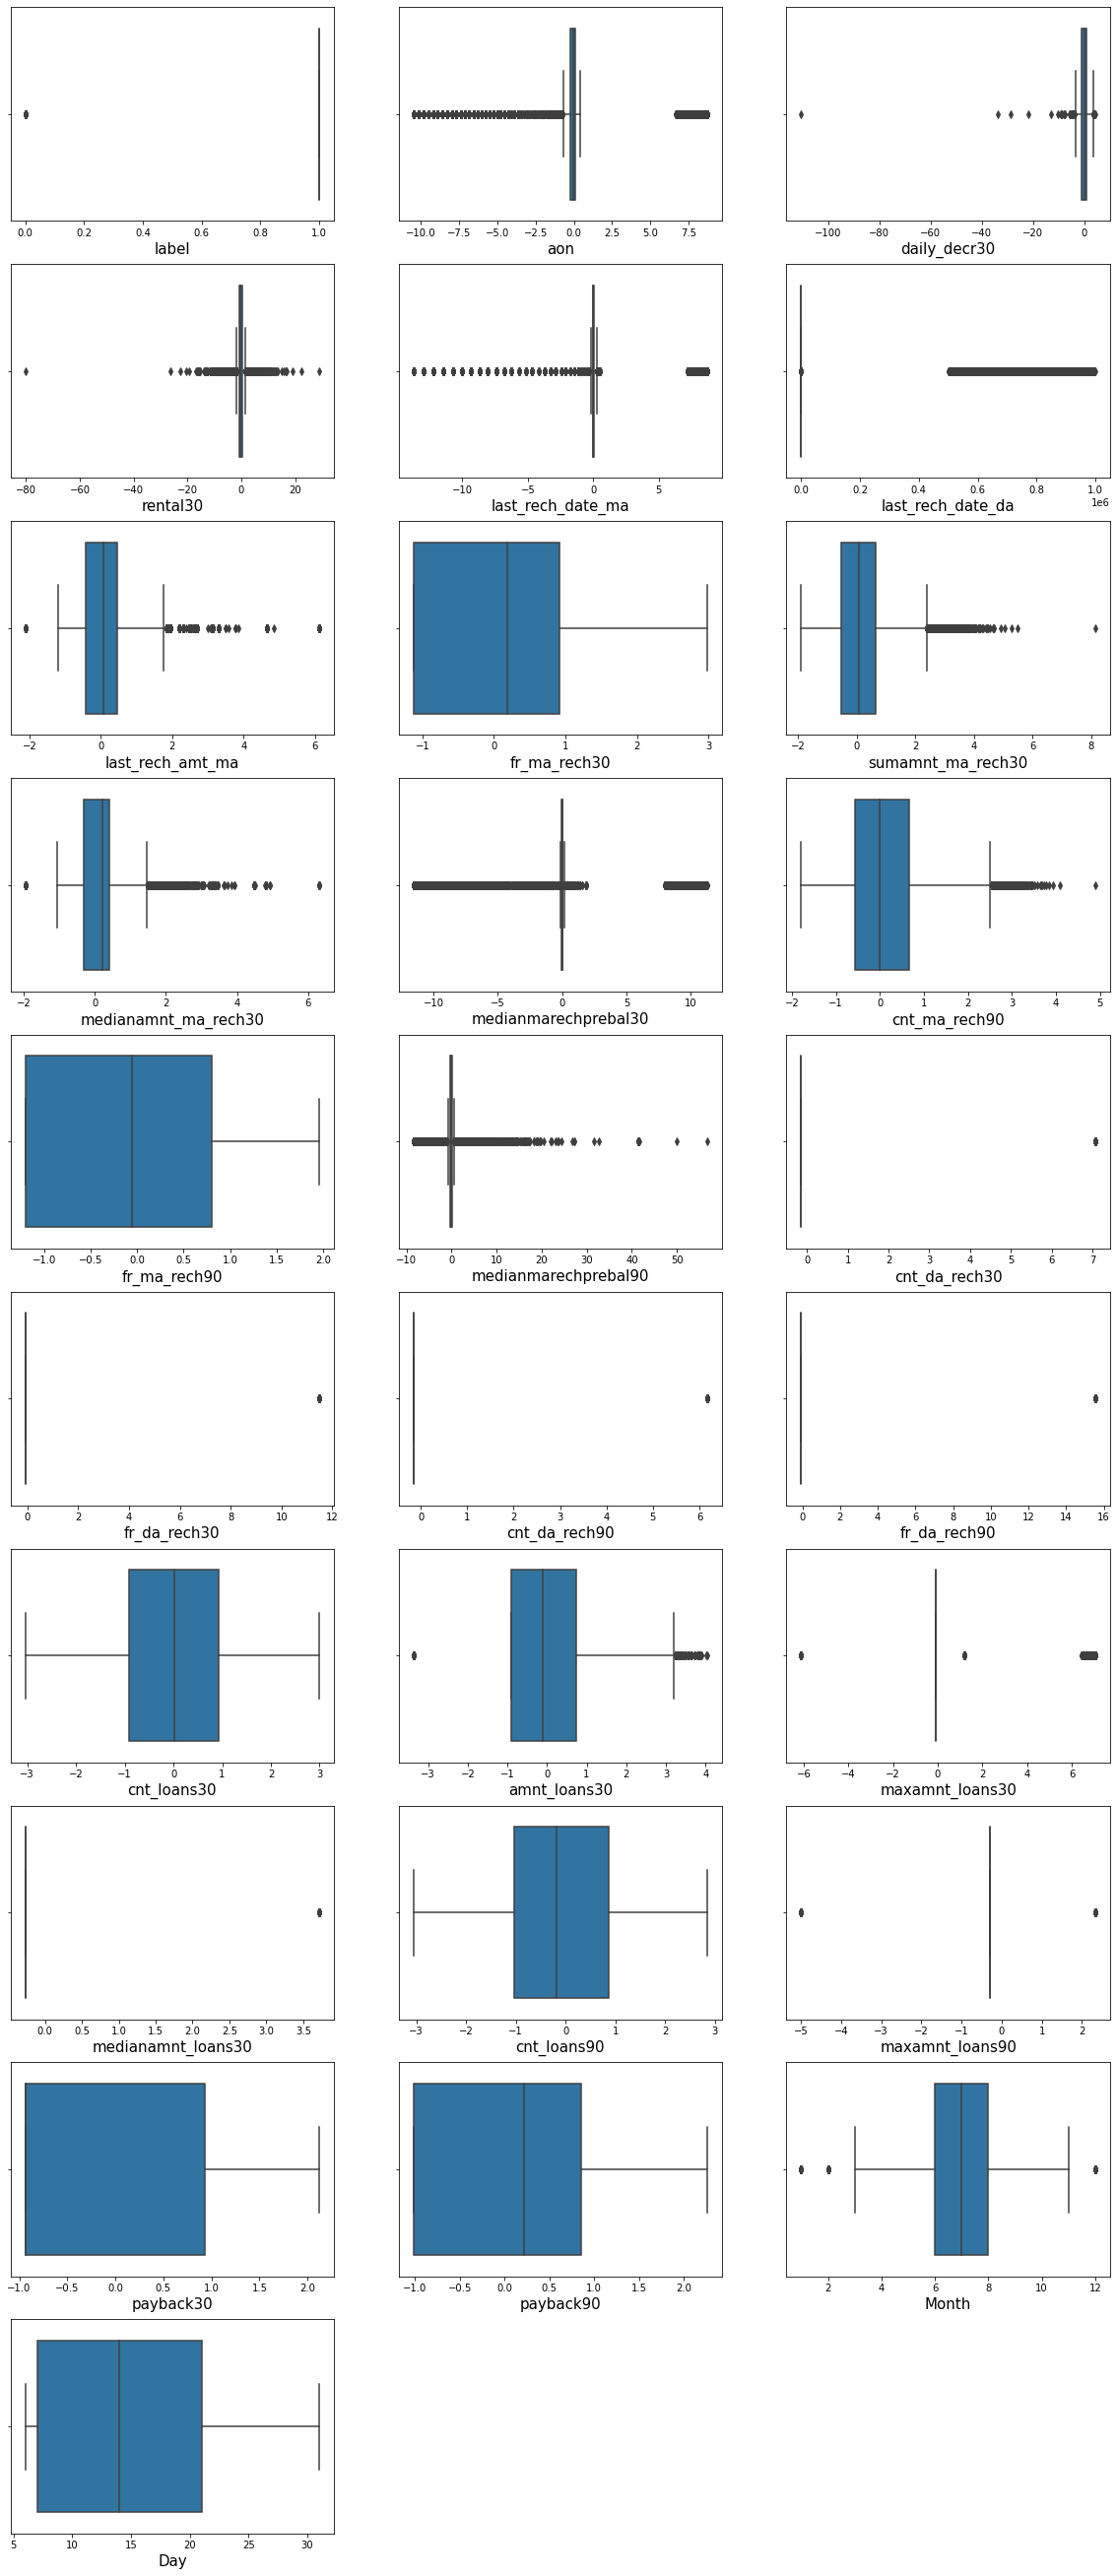

In [19]:
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=33:
        ax=plt.subplot(11,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

2. Outlier Removal:

In [54]:
z_score = zscore(df[['aon','daily_decr30','rental30','last_rech_date_ma','last_rech_date_da','last_rech_amt_ma',
                'sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_da_rech90','medianmarechprebal90',
                   'amnt_loans30']])     
abs_z_score=np.abs(z_score)#converting data into standard normal distribution

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]
df.describe()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
count,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,...,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000
mean,0.873242,-0.037163,-0.020854,-0.061255,0.016764,0.859468,-0.028380,0.006491,-0.015529,-0.021051,...,0.052646,0.053151,0.089975,0.003948,0.036370,0.038885,0.021342,0.014904,6.610587,14.627526
std,0.332703,0.208169,0.948459,0.743344,0.107154,6.835657,0.987937,0.997324,0.982464,0.984464,...,0.925460,0.901582,0.641355,1.006777,0.951726,0.861456,1.001102,0.997661,2.385931,7.921927
min,0.000000,-2.868250,-2.951240,-2.998313,-2.850891,-29.000000,-2.115772,-1.128949,-1.902189,-1.961729,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917,1.000000,6.000000
25%,1.000000,-0.196261,-0.930608,-0.560679,-0.058426,0.000000,-0.432065,-1.128949,-0.534158,-0.305859,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917,6.000000,7.000000
50%,1.000000,-0.041804,-0.021561,-0.326053,0.000044,0.000000,0.083417,0.188872,0.069979,0.208594,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,0.094998,0.254914,7.000000,14.000000
75%,1.000000,0.118223,0.767402,0.205176,0.070105,0.000000,0.449550,0.911241,0.631792,0.403712,...,0.924658,0.749156,-0.101998,-0.269051,0.859101,-0.285611,0.955493,0.853787,8.000000,21.000000
max,1.000000,0.439032,2.981901,2.999791,0.493635,115.000000,2.687866,2.981190,2.999990,2.996583,...,2.574368,2.993066,7.040674,3.716814,2.844208,2.325828,2.120943,2.259043,12.000000,31.000000


In [20]:
df.skew()

label                   -2.243716
aon                     -1.085870
daily_decr30             0.273949
rental30                 1.557923
last_rech_date_ma       -3.060958
last_rech_date_da        9.911499
last_rech_amt_ma        -0.162703
fr_ma_rech30             0.147497
sumamnt_ma_rech30       -0.405177
medianamnt_ma_rech30    -0.268185
medianmarechprebal30    -8.141601
cnt_ma_rech90           -0.050876
fr_ma_rech90             0.142019
medianmarechprebal90     2.401437
cnt_da_rech30            7.722537
fr_da_rech30            13.920426
cnt_da_rech90            6.556890
fr_da_rech90             0.000000
cnt_loans30              0.415320
amnt_loans30             0.578377
maxamnt_loans30          6.619603
medianamnt_loans30       3.416695
cnt_loans90              0.325004
maxamnt_loans90          2.278082
payback30                0.255848
payback90                0.177548
Month                   -0.092037
Day                      0.452434
dtype: float64

In [55]:
y=df['label']
x=df.drop(columns=['label'])

In [56]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [57]:
y.value_counts()

1    166673
0    166673
Name: label, dtype: int64

- Our target variable is balanced now we will standardize the features as they are in different scales.

#### Standardization:

In [58]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split) to gauge how well the classifier is working.

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

#### Model Creation:
Now let's see the Accuracy scores according to six models we have used below. we are using models like,
1. Logistic Regression,
2. Decision Tree Classifier,
3. Random Forest Classifier,
4. K-Nearest Neighbors Classifier,
5. Gradient Boosting Classifier,
6. Support Vector Classifier.

#### 1. Logistic Regression:

In [27]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")
      


=======================Train Result===========================
Accuracy score:77.39%
_______________________________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.772081       0.775796  0.773928       0.773939   
recall          0.776914       0.770946  0.773928       0.773930   
f1-score        0.774490       0.773363  0.773928       0.773927   
support    124925.000000  125084.000000  0.773928  250009.000000   

            weighted avg  
precision       0.773940  
recall          0.773928  
f1-score        0.773926  
support    250009.000000  
________________________________________________________________
 Confusion Matrix:
[[97056 27869]
 [28651 96433]]



In [28]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")      


=======================Test Result of LR ===========================
Accuracy score:77.33%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.771878      0.774832  0.773342      0.773355      0.773352
recall         0.777259      0.769410  0.773342      0.773334      0.773342
f1-score       0.774559      0.772111  0.773342      0.773335      0.773338
support    41748.000000  41589.000000  0.773342  83337.000000  83337.000000
________________________________________________________________
 Confusion Matrix:
[[32449  9299]
 [ 9590 31999]]



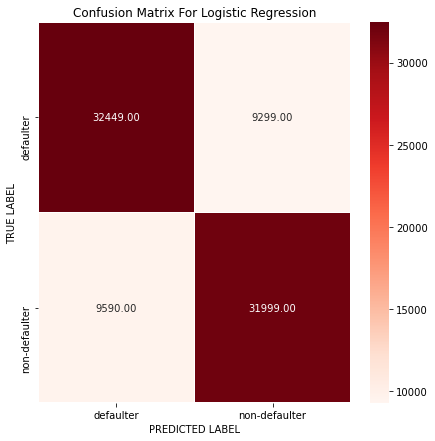

In [29]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['defaulter','non-defaulter']
y_axis_labels=['defaulter','non-defaulter']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [30]:
#checking ROC_AUC Score of Logistic Regression:
roc_auc_score(y_test,lr.predict(x_test))

0.7733344857084372

#### 2.  Decision Tree Classifier :

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.999952       1.000000  0.999976       0.999976   
recall          1.000000       0.999952  0.999976       0.999976   
f1-score        0.999976       0.999976  0.999976       0.999976   
support    124925.000000  125084.000000  0.999976  250009.000000   

            weighted avg  
precision       0.999976  
recall          0.999976  
f1-score        0.999976  
support    250009.000000  
________________________________________________________________
 Confusion Matrix:
[[124925      0]
 [     6 125078]]



In [32]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")      
      


=======================Test Result of dt_clf===========================
Accuracy score:90.70%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.900429      0.913831  0.907004      0.907130      0.907117
recall         0.915613      0.898363  0.907004      0.906988      0.907004
f1-score       0.907957      0.906031  0.907004      0.906994      0.906996
support    41748.000000  41589.000000  0.907004  83337.000000  83337.000000
________________________________________________________________
 Confusion Matrix:
[[38225  3523]
 [ 4227 37362]]



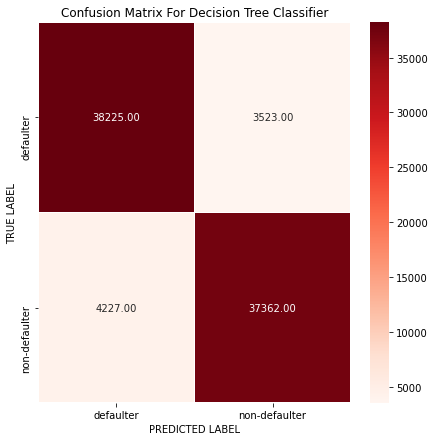

In [33]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['defaulter','non-defaulter']
y_axis_labels=['defaulter','non-defaulter']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [34]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.9069876358759518

#### 3. Random Forest Classifier :

In [72]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.999984       0.999968  0.999976       0.999976   
recall          0.999968       0.999984  0.999976       0.999976   
f1-score        0.999976       0.999976  0.999976       0.999976   
support    124925.000000  125084.000000  0.999976  250009.000000   

            weighted avg  
precision       0.999976  
recall          0.999976  
f1-score        0.999976  
support    250009.000000  
________________________________________________________________
 Confusion Matrix:
[[124921      4]
 [     2 125082]]



In [73]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")   


=======================Test Result of RF_clf===========================
Accuracy score:95.02%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.951117      0.949263   0.95019      0.950190      0.950192
recall         0.949363      0.951021   0.95019      0.950192      0.950190
f1-score       0.950239      0.950141   0.95019      0.950190      0.950190
support    41748.000000  41589.000000   0.95019  83337.000000  83337.000000
________________________________________________________________
 Confusion Matrix:
[[39634  2114]
 [ 2037 39552]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

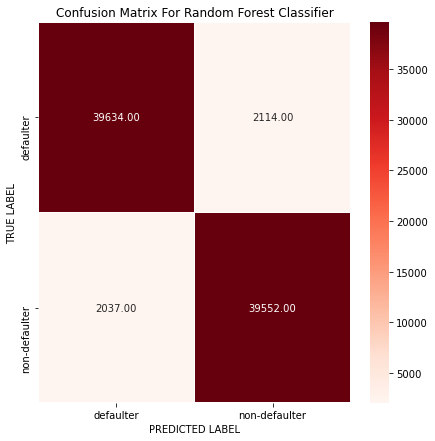

In [74]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['defaulter','non-defaulter']
y_axis_labels=['defaulter','non-defaulter']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [75]:
#ROC_AOC Score of Random Forest Classifier:

roc_auc_score(y_test,rf.predict(x_test))

0.950191773159334

#### 4. Gradient Boosting Classifier:

In [39]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:90.14%
_______________________________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.893298       0.909819  0.901396       0.901559   
recall          0.911547       0.891257  0.901396       0.901402   
f1-score        0.902330       0.900443  0.901396       0.901387   
support    124925.000000  125084.000000  0.901396  250009.000000   

            weighted avg  
precision       0.901564  
recall          0.901396  
f1-score        0.901386  
support    250009.000000  
________________________________________________________________
 Confusion Matrix:
[[113875  11050]
 [ 13602 111482]]



In [40]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n") 


=======================Test Result===========================
Accuracy score:90.13%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.893089      0.909962  0.901328      0.901526      0.901510
recall         0.912235      0.890380  0.901328      0.901307      0.901328
f1-score       0.902561      0.900064  0.901328      0.901313      0.901315
support    41748.000000  41589.000000  0.901328  83337.000000  83337.000000
________________________________________________________________
 Confusion Matrix:
[[38084  3664]
 [ 4559 37030]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

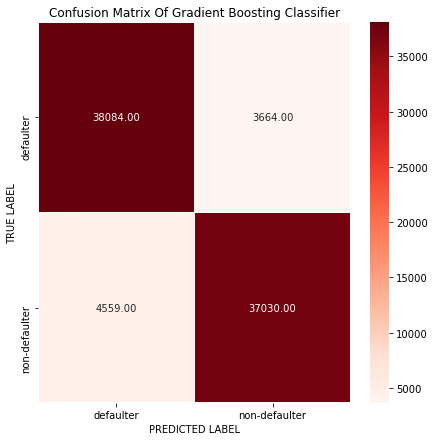

In [41]:
cm = confusion_matrix(y_test,pred)

x_axis_labels=['defaulter','non-defaulter']
y_axis_labels=['defaulter','non-defaulter']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [47]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,gbdt_clf.predict(x_test))

0.901227593609596

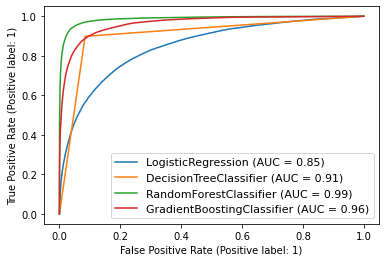

In [42]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

- The AUC curve of  Random Forest Classifier has covered 99% area under the curve.

Now let's do evaluation of the models using cross validation:

####    Cross validation :

   Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [43]:
# Checking Cross Validation score for Logistic Regression:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:77.27%


In [44]:
# Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:90.47%


In [45]:
# Checking Cross Validation of Random Forest Classifier:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:94.78%


In [46]:
#Checking Cross Validation Score of Gradient Boosting Classifier:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:89.90%


Now let's check the difference between Accuracy Score and Cross Validation Score to select the best model from the 5 models:

- Diffrence betwwwn Accuracy score and Cross Validation Score of 5 different models :
- LR = 77.33-77.27 = 0.06 
- DT = 90.70-90.47 = 0.23 
- Rf = 94.99-94.78 = 0.21 
- Gbdt_clf = 90.13-89.90 = 0.23



So, as the accuracy score of Random Forest Classifier is 95% and  as the difference of Accuracy Score and CV of Random Forest Classifier is very less, it's the best Model. Let's do Hyperparameter Tuning of Random Forest Classifier.

#### Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter of Random Forest Classifier. After getting the best parameters we can use those with the model to obtain best accuracy.

In [63]:
rf = RandomForestClassifier()
params={'n_estimators':[12,15,17],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,17],
       'min_samples_split':[10,12,13],
       'min_samples_leaf':[4,6,8]}



In [64]:
grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

best_params=>  {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 17}


In [65]:
rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [66]:
rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

con_mat=>  
 [[38809  2939]
 [ 3608 37981]]
Accuracy of rf After Hyperparameter Tuning==>  92.14394566639068


In [68]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     41748
           1       0.93      0.91      0.92     41589

    accuracy                           0.92     83337
   macro avg       0.92      0.92      0.92     83337
weighted avg       0.92      0.92      0.92     83337



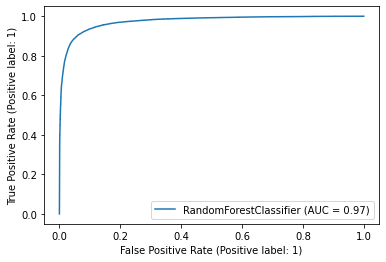

In [71]:
disp = plot_roc_curve(rfc,x_test,y_test)


- We can conclude, Random Forest Classifier (without hyperparameter tuning )is the best model as the density of area under curve is showing almost 99%.

Let's save the best model.


In [77]:
# model prediction using RF
x_predict = list(rf.predict(x_test))
rf_micro = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_micro))

        predicted_values  orignal_values
194229                 0               0
266153                 0               0
202549                 1               0
56647                  1               1
85073                  1               1
...                  ...             ...
205172                 0               0
10883                  1               1
37435                  1               1
94514                  1               1
124176                 1               1

[83337 rows x 2 columns]


In [78]:
#import joblib
import joblib

joblib.dump(rf,'rf_micro_credit.obj')

# SAVING THE MODEL

['rf_micro_credit.obj']

In [79]:
rf_from_joblib=joblib.load('rf_micro_credit.obj')
rf_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

#### Conclusion:
There were 209593 rows and 37 columns in the dataset. The provided dataset was not having any missing value. But the features were containtaing outliers that we have treated with z-score. 
We have made 4 models, out of which Random Forest Classifier has given the best accuracy of 95%.